# NLP 機器學習:自然語言處理實務
# (讓電腦擁有理解人類語言的能力，就是自然語言處理 (Natural Language Processing，縮寫 NLP)。
## 授課教師: 黃志泰
## 實作教材手冊初編撰日期:2019.2.01
## 實作內容:實作與訓練學習 Python+NLP+ChatGpt
## 實作訓練時數:15~18小時
## 備註:
<hr>

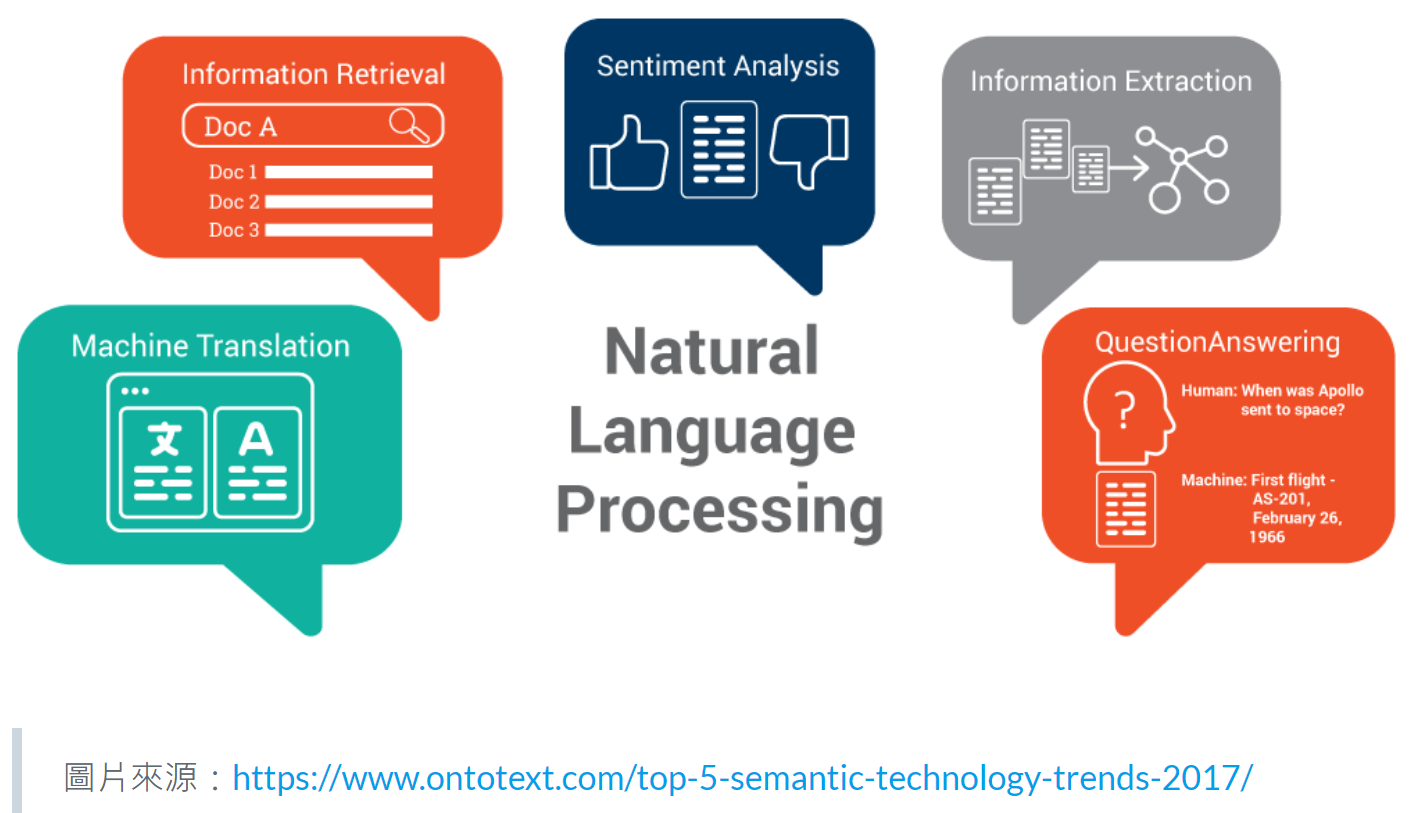

# <li>文本情感分析(sentiment analysis)(NLP應用四)
    
### 我们希望得到的是人们对一件事情评价的情感倾向。比如支持还是反对一件事情，喜欢一件产品与否--结果可能是积极的，消极的或者中立的。比如
### ==>特别喜欢这种可爱的小狗
###       这句话的情感倾向显而易见是正面的。
### 目前常见的情感极性分析方法主要是两种：基于情感词典(規則)的方法和基于机器学习的方法。
### 通常情感打分的方式 以文本情感极性判断，EX:score > 0判断为正向，score < 0判断为负向。
## 計算方式 
## 情感分析=对象∗观点∗ 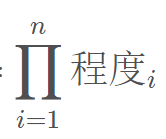


## <li>基於ChatGpt的文本情感分析(sentiment analysis)

In [2]:
!pip install python-dotenv

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
!pip install --upgrade openai

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 325.5/325.5 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 75.6/75.6 kB 4.1 MB/s eta 0:00:00
     -------------------------------------- 409.0/409.0 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 77.9/77.9 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 58.3/58.3 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 3.2 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
!pip install opencc

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 716.1/716.1 kB 1.7 MB/s eta 0:00:00


In [7]:
from dotenv import load_dotenv
import os
import openai
#將呼叫chatgpt api 相關model的程式另寫在aimodels.py
from src.models import OpenAIModel
from src.memory import Memory
from src.logger import logger

In [8]:
#OPENAI_API key 不要直接填寫在程式碼內,openai 可能因資安問題不執行chatgpt api呼叫
#請將相關參數放在檔案中,如使用環境設定檔: .env
# .env file 內容
#OPENAI_API =" put your api key value"
#OPENAI_MODEL_ENGINE = 'gpt-3.5-turbo'
#SYSTEM_MESSAGE = 'You are a helpful assistant.'
#
#load_dotenv 讀入環境設定檔
load_dotenv('.env')
#設定openai 的 api_key 
openai.api_key = os.getenv('OPENAI_API')
#
my_secret = os.getenv('OPENAI_API')
model = OpenAIModel(api_key=my_secret)
#

In [10]:
strall="「梅雨的預測有變化了。」天氣風險管理公司總監賈新興說，最新資料顯示，5月2月開始形成梅雨的環境比5月下旬更佳，天氣風險公司總經理彭啟明也在臉書發文說，下周有機會來一波梅雨。賈新興在臉書發文指出，過去幾次的預報顯示，5月上旬的環境不像下旬來得好，但是最新的預報有了很大的變化。他說，下旬的那波還在，但資料顯示5月2號開始的大環境，建立的比下旬來的好。他說，4月25日至5月1日太平洋高壓仍舊掌控全場，從南海至菲律賓及台灣都籠罩在太平洋高壓下，持續穩定高溫的天氣；但5月2日至5月8日整個型態大轉變，太平洋高壓的勢力明顯退出了南海及菲律賓，此時也讓西南季風有機可趁。賈新興指出，除此之外，看到MJO預測時，又多了一條確認的訊號。不過他也說，預報有其不確定性，但越來越多的訊號都出現時，要更頻繁觀察預報的變化。中央氣象局說，今天白天高溫依舊，各地大多多雲到晴，中午前後溫度仍可達33至35度，其中台東大武周遭地區有焚風發生的機率，高溫可能達36度以上；由於天氣穩定，只有中部以北山區及東北部地區午後有些許短暫雷陣雨，但降雨時間短，對戶外活動影響不致太大。"

In [12]:
#情緒分析
prompt=[
        {
            "role": "system",
            "content": "You are a helpful assistant."
        },
        {
                          'role': 'user',
                          'content': "以下為一段文字內容,請針對提問以繁體中文來回覆進行情緒分析：告知這段文字內容中的情緒色彩是正面的、負面的還是中立的？在文字中的相關人員表達的情感如何？是否有明顯的情緒傾向？意見分析：什麼是這段文字中最重要的意見或觀點？人員討論的主題有什麼獨特的見解或看法？是否提及了一致的意見或有爭議的觀點？態度分析：人員在文字中展現出什麼樣的態度？是支持性的、批判性的還是中立的？對討論的話題持怎樣的態度？是否有明確的傾向？綜合分析：整體而言，文字中的情感、意見和態度如何？是否有一致性或分歧性？這些情感、意見和態度如何影響了文字的內容和事情進展:" + strall+ "\n A:"
              #"以下為學生企業實習合約內容,請針對提示以繁體中文來回覆審閱結果告知合約正常或有問題,若覺得有問題請找出實習合約中的潛在問題或風險：1.立契約書人：合約是否有甲方,乙方,丙方三方立契約書人？2.實習期間與地點：合約是否清楚明確說明實習期間與地點？3.工作職掌及學習守則：合約是否清楚說明三方工作職掌與實習學習守則？4.實習內容與時數：合約是否清楚說明實習內容與至少648小時的實習時數？5.實習津貼及保險與福利：合約是否清楚說明實習津貼及保險與福利？6.實習報到及輔導與安全維護：合約是否清楚說明實習報到及輔導與安全維護？7.法律責任澄清：合約是否清楚明確地界定了雙方的法律責任？是否有模糊或含糊不清的條款可能導致爭議？8.隱私權保護：合約是否包含保護個人資料和隱私的條款？這些條款是否充分保護隱私權？9.機密性和知識產權：合約中是否明確規定了對於機密信息的保密責任？實習期間創造的任何知識產權歸屬情況？10.工作條件和安全：合約中是否提及了工作條件和工作環境的安全？是否有關於工時、加班或安全措施的相關規定？11.終止條款：是否有關於提前終止合約的條款？這些條款是否合理且公平？12.評估潛在風險：是否有任何可能導致潛在法律風險或不利後果的條款？這些風險是否可以減輕或避免？13.爭議解決機制：合約中是否包含了解決爭議的機制？這些機制是否公平且有效？" + strall+ "\n A:"
              
              }]
#
role, response, error_message = model.chat_completions(prompt, 'gpt-4-1106-preview')   
if error_message:
          print(error_message)    
else:
          print(response)
#摘要
#f3 = open(filename+"3.txt", "w",encoding="utf-8")
#f3.write(response)
#f3.close()   

情緒分析：從提供的文字內容來看，描述的是一個有關天氣預測的變化和預報，整體而言情緒色彩較為中性，因為這是一篇對氣象情況的描述和分析。在文字中的相關人員，如賈新興和彭啟明，表達了專業和審慎的情感，而沒有涉及強烈的個人情緒或情感傾向。

意見分析：最重要的意見或觀點是對未來氣象預報的變化和預測。人員討論的主題是梅雨季節的來臨及其相關起始時間的變化。他們關於天氣預報的見解是基於最新資料和模式預測，強調預報的不確定性以及變化迅速的情況，並建議需要更頻繁地關注天氣預報的更新。文章中沒有直接提及意見分歧。

態度分析：人員在文字中展現出的態度是專業和介入性的。他們對待討論的話題表現出審慎和專注，並且透過專業知識來進行分析和預報。雖然文中賈新興和彭啟明針對預報提供信息並進行解釋，但態度上保持著一定程度的中立性，因為他們均提醒了預報的不確定性。

綜合分析：整體而言，文字中的情感、意見和態度是集中在傳達最新的氣象預報和分析，並沒有過多的情緒表達。情感較為平和，重點在於專業性的意見傳達以及一種觀望和預測未來的態度。這些因素綜合在一起，塑造了一篇重視氣象預報準確性和實用性的文章，並未因情緒、意見或態度的強烈表現而影響內容或事情進展。


In [13]:
#關鍵話題分析
prompt=[
        {
            "role": "system",
            "content": "You are a helpful assistant."
        },
        {
                          'role': 'user',
                          'content': "以下為一段文字內容,請針對提問以繁體中文來回覆主要主題識別：在文句中，哪些主題或話題被討論得最頻繁？能否辨識出這段文字的核心主題是什麼？關鍵話題：有哪些特定的話題在文句中被重點討論了？它們與主題有何關聯？這些話題在這段文字中扮演了什麼樣的角色？它們受到了多大程度的關注？頻率分析：在這段文字中，各主題或話題被提及的頻率如何？有哪些是被重複提及的？哪些主題是這段文字中人員最感興趣的？它們的提及頻率是否與這段文字的進展有關？重點內容：有哪些內容在這段文字中佔據了主導地位？它們在整個文字中的影響力如何？在這段文字的不同階段，主要的討論內容是否有改變？這種變化反映了什麼？綜合分析：整體而言，哪些主題或話題在這段文字中佔據了主導地位？它們對於這段文字的內容整體影響如何？文句中頻繁討論的主題與這段文字的目標或背景之間是否有關聯？" + strall+ "\n A:"
             
              }]
#
role, response, error_message = model.chat_completions(prompt, 'gpt-4-1106-preview')   
if error_message:
          print(error_message)    
else:
          print(response)
#摘要
#f3 = open(filename+"3.txt", "w",encoding="utf-8")
#f3.write(response)
#f3.close()   

在這段文字中，主要被討論的主題是「梅雨及天氣預報」。可以辨識出這段文字的核心主題是關於臺灣即將來臨的梅雨季節，以及氣象專家對此的預測分析。

關鍵話題主要包括以下幾點：

1. 梅雨季節預報的最新變化與預測：天氣風險管理公司賈新興說明最新的資料顯示5月初形成梅雨的環境比5月下旬來得更佳。
2. 彭啟明在臉書上的發文：提到下週可能有機會迎來一波梅雨。
3. 太平洋高壓的變化：賈新興說明在4月底至5月初期間，太平洋高壓將不再控制相關地區，這有利於梅雨季節的形成。
4. MJO（瑪德焦斯卡輪胎振盪）預測：提到有新的訊號出現，這將影響未來的天氣變化。
5. 中央氣象局對當前天氣的描述：當天的氣溫高，可能會有短暫的雷陣雨。

在文中，這些話題扮演瞭解釋和預測即將到來的梅雨季節的角色，並且受到了很大程度的關注。尤其是梅雨季節的預測變化被重複提及，表明這是人員非常感興趣且重要的主題。這些提及頻率在這段文字的討論進展中非常關鍵。

整體來看，梅雨季節及相關氣候變化的預報在這段文字中佔據了主導地位，對整倗文字內容有很大的影響。這些討論表明氣象專家正在密切關注不同天氣模式的變化，這與臺灣即將迎來的梅雨季節背景相關。


In [14]:
#識別人物
prompt=[
        {
            "role": "system",
            "content": "You are a helpful assistant."
        },
        {
                          'role': 'user',
                            'content': "以下為一段文字內容,請針對提問以繁體中文來回覆識別人物：在文句中提到了哪些人物？他們是誰，與這段文字內容有何關聯？這些人物在這段文字中扮演了什麼樣的角色？他們的身份和地位是否對這段文字內容產生了影響？識別組織：這段文字中是否提及了任何組織或機構？這些組織是什麼，他們與這段文字討論的主題有何關聯？這些組織在這段文字中的作用是什麼？它們的立場或觀點是否影響了這段文字內容？識別地點或物品：這段文字中是否涉及了特定的地點或場所或物品？這些地點或物品在這段文字中有何重要性？這些地點或物品對於這段文字內容或人員的話語有何影響？它們是否是這段文字討論的重要背景或場景？相關資訊擷取：對於提到的人物、組織或地點或物品等訊息，可以進一步提取相關的背景資料、關聯事件或歷史情況，以幫助更好地理解其在這段文字中的作用和影響。綜合分析：整體而言，提到的人物、組織或地點或物品對於這段文字內容和進度有何重要性？它們如何影響了這段文字的焦點和方向？這些人物、組織或地點或物品的出現是否反映了這段文字的特定背景或現實？對於理解這段文字內容有何啟示？" + strall+ "\n A:"
             }]
#
role, response, error_message = model.chat_completions(prompt, 'gpt-4-1106-preview')   
if error_message:
          print(error_message)    
else:
          print(response)
#摘要
#f3 = open(filename+"3.txt", "w",encoding="utf-8")
#f3.write(response)
#f3.close()   

在這段文字中提到的人物有：

1. 賈新興：天氣風險管理公司總監，他在臉書發文提及最新預測資料顯示，5月2號開始形成梅雨的環境比下旬更佳。
2. 彭啟明：天氣風險公司總經理，也在臉書發文說下週有機會迎來梅雨。

這兩位人物都是從業於氣象相關領域的專業人売，在這段文字中扮演的角色是提供天氣預報及分析的專家。他們的身份和地位使得他們的發言具有一定的專業權威性，影響了讀者對於梅雨預測的信任程度。

提及的組織及機構有：

1. 天氣風險管理公司：一家專門進行天氣預報及風險管理分析的組織，賈新興和彭啟明所屬。這家公司與本段文字主題相關，因為他們提供了重要的天氣預報資訊。
2. 中央氣象局：臺灣的官方氣象機構，負責提供氣象資料和預報。在本段文字中，中央氣象局提供了關於當天氣溫和可能發生的天氣狀況的資訊。

這些組織的立場和觀點鮮明地影響了這段文字內容，因為文字重點放在氣象預渧和相關決策。

涉及的地點或物品包括：

1. 南海、菲律賓、臺灣：這些地區都在太平洋高壓的影響範圍內，地點的提及是為了描述氣象環境及預測未來可能的氣候變化。
2. 臺東大武周遭地區：這個地方被特別提出，因為可能會有焚風發生，溫度可能特別高。

這些地點和物品對於理解梅雨形成的時間和地理環境變化至關重要，是討論氣候現象的重要背景和場景。

整體而言，提及的人物、組織、及地點對於這段文字的內容和進度非常重要。他們的專業分析和預報為公眾提供了氣象資訊，影響了公眾對梅雨季節預期的理解。出現這些信息反映了特定的專業背景和現實情況，幫助讀者更好地理解和準備應對未來的天氣變化。
